In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d30471a69fd2a3c89bb0c23c9dc6f562


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | ozinki
Processing Record 3 of Set 1 | kusk
City not found. Skipping...
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | inta
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | kudahuvadhoo
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | ulaangom
Processing Record 13 of Set 1 | hualmay
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | haines junction
Processing Record 16 of Set 1 | linhares
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | adrar
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | pafos
Processing Record 21 of Set 1 | sara

Processing Record 36 of Set 4 | saleaula
City not found. Skipping...
Processing Record 37 of Set 4 | oussouye
Processing Record 38 of Set 4 | san jeronimo
Processing Record 39 of Set 4 | te anau
Processing Record 40 of Set 4 | visby
Processing Record 41 of Set 4 | knysna
Processing Record 42 of Set 4 | petatlan
Processing Record 43 of Set 4 | ixtapa
Processing Record 44 of Set 4 | yumen
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | price
Processing Record 49 of Set 4 | inuvik
Processing Record 50 of Set 4 | alice springs
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | iquique
Processing Record 3 of Set 5 | rawson
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | sao joao da barra
Processing Record 8 of Set 5 | henties bay
Processi

Processing Record 27 of Set 8 | klaksvik
Processing Record 28 of Set 8 | high level
Processing Record 29 of Set 8 | point pedro
Processing Record 30 of Set 8 | guanica
Processing Record 31 of Set 8 | palu
Processing Record 32 of Set 8 | sahrak
City not found. Skipping...
Processing Record 33 of Set 8 | coihaique
Processing Record 34 of Set 8 | kismayo
Processing Record 35 of Set 8 | leiyang
Processing Record 36 of Set 8 | isla vista
Processing Record 37 of Set 8 | isabela
Processing Record 38 of Set 8 | ponta delgada
Processing Record 39 of Set 8 | tocopilla
Processing Record 40 of Set 8 | utiroa
City not found. Skipping...
Processing Record 41 of Set 8 | isla mujeres
Processing Record 42 of Set 8 | lexington
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | jasper
Processing Record 45 of Set 8 | grindavik
Processing Record 46 of Set 8 | zhezkazgan
Processing Record 47 of Set 8 | fort nelson
Processing Record 48 of Set 8 | chancay
Processing Record 49 of Set 8 | paita

Processing Record 16 of Set 12 | kalabo
Processing Record 17 of Set 12 | aflu
City not found. Skipping...
Processing Record 18 of Set 12 | tautira
Processing Record 19 of Set 12 | samur
Processing Record 20 of Set 12 | great yarmouth
Processing Record 21 of Set 12 | jacareacanga
Processing Record 22 of Set 12 | sabha
Processing Record 23 of Set 12 | talnakh
Processing Record 24 of Set 12 | shibata
Processing Record 25 of Set 12 | bikaner
Processing Record 26 of Set 12 | zalantun
Processing Record 27 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 28 of Set 12 | jawhar
Processing Record 29 of Set 12 | coahuayana
Processing Record 30 of Set 12 | conde
Processing Record 31 of Set 12 | hobyo
Processing Record 32 of Set 12 | halmstad
Processing Record 33 of Set 12 | zhanaozen
Processing Record 34 of Set 12 | buckeye
Processing Record 35 of Set 12 | huarmey
Processing Record 36 of Set 12 | tadine
Processing Record 37 of Set 12 | yafran
Processing Record 38 of Set 12 | lapuz

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ozinki,51.1786,49.6769,45.12,80,40,10.40,RU,2021-09-16 21:07:33
1,Mount Gambier,-37.8333,140.7667,56.52,47,96,18.10,AU,2021-09-16 21:07:33
2,Khatanga,71.9667,102.5000,32.29,85,100,1.74,RU,2021-09-16 21:07:33
3,Inta,66.0317,60.1659,37.78,81,95,13.76,RU,2021-09-16 21:07:34
4,Hobart,-42.8794,147.3294,44.11,94,20,3.00,AU,2021-09-16 21:07:34
5,Kudahuvadhoo,2.6708,72.8944,82.85,74,89,7.96,MV,2021-09-16 21:07:34
6,Mataura,-46.1927,168.8643,41.49,73,13,4.76,NZ,2021-09-16 21:07:35
7,Kruisfontein,-34.0033,24.7314,48.88,79,6,12.10,ZA,2021-09-16 21:07:35
8,Ulaangom,49.9811,92.0667,53.29,38,98,3.29,MN,2021-09-16 21:07:35
9,Hualmay,-11.0964,-77.6139,65.39,73,15,11.70,PE,2021-09-16 21:07:36


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ozinki,RU,2021-09-16 21:07:33,51.1786,49.6769,45.12,80,40,10.40
1,Mount Gambier,AU,2021-09-16 21:07:33,-37.8333,140.7667,56.52,47,96,18.10
2,Khatanga,RU,2021-09-16 21:07:33,71.9667,102.5000,32.29,85,100,1.74
3,Inta,RU,2021-09-16 21:07:34,66.0317,60.1659,37.78,81,95,13.76
4,Hobart,AU,2021-09-16 21:07:34,-42.8794,147.3294,44.11,94,20,3.00
...,...,...,...,...,...,...,...,...,...
555,Sambava,MG,2021-09-16 21:10:07,-14.2667,50.1667,70.20,88,47,7.23
556,Goderich,CA,2021-09-16 21:10:07,43.7501,-81.7165,76.03,56,0,4.61
557,Aykhal,RU,2021-09-16 21:10:08,66.0000,111.5000,32.41,85,40,9.46
558,Waipawa,NZ,2021-09-16 21:10:08,-41.4122,175.5153,44.02,65,100,17.52


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

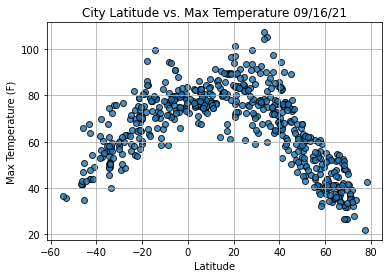

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

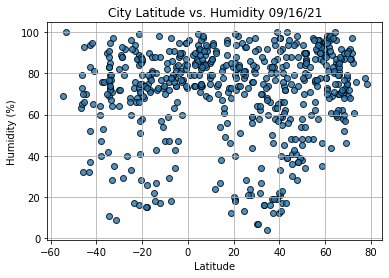

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

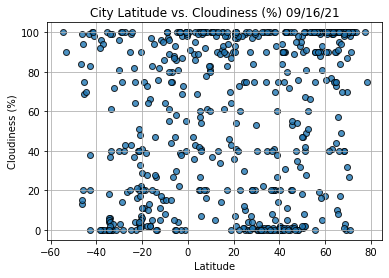

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

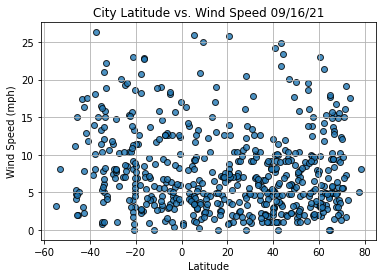

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()